In [1]:
import pandas as pd
import numpy as np    
import statsmodels.api as sm
import datetime

from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv('modelling_data.csv', index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1986-02-14', '1986-02-21', '1986-02-28', '1986-03-07',
               '1986-03-14', '1986-03-21', '1986-03-28', '1986-04-04',
               '1986-04-11', '1986-04-18',
               ...
               '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14',
               '2021-05-21', '2021-05-28', '2021-06-04', '2021-06-11',
               '2021-06-18', '2021-06-25'],
              dtype='datetime64[ns]', name='ds', length=1846, freq=None)

In [4]:
def run_sarima(df, ts,p,d,q,freq):

    import statsmodels.api as sm

    model = sm.tsa.statespace.SARIMAX(df[ts],trend='n', order=(p,d,q), seasonal_order=(p,d,q,freq))
    results_ = model.fit()
    
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]

    
    tss = sum([(i-np.mean(ts_modified))**2 for i in ts_modified])
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss/len(df[ts]))
    r_square = 1 - (rss/tss)
    
    plt.plot(df[ts])
    plt.plot(results_.fittedvalues, color='red')
    plt.title('For SARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
    plt.show()
    plt.close()
    
    print(results_, results_.summary())

/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


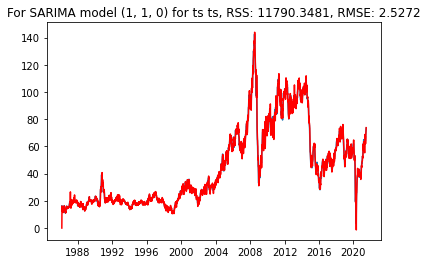

<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7fedab76ffa0>                                      SARIMAX Results                                      
Dep. Variable:                                 ts   No. Observations:                 1846
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -4209.365
Date:                            Fri, 02 Jul 2021   AIC                           8424.729
Time:                                    15:00:50   BIC                           8441.204
Sample:                                02-14-1986   HQIC                          8430.812
                                     - 06-25-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2115      0.0

In [5]:
mod1 = run_sarima(df=df,ts='ts',p=1,d=1,q=0,freq=52)

/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


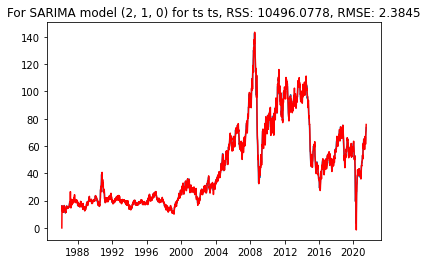

<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7fec8d6d8ee0>                                      SARIMAX Results                                      
Dep. Variable:                                 ts   No. Observations:                 1846
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -4106.473
Date:                            Fri, 02 Jul 2021   AIC                           8222.947
Time:                                    15:01:28   BIC                           8250.405
Sample:                                02-14-1986   HQIC                          8233.085
                                     - 06-25-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2032      0.0

In [6]:
mod1 = run_sarima(df=df,ts='ts',p=2,d=1,q=0,freq=52)

In [7]:
df['ts'][1:1646]

ds
1986-02-21    14.39
1986-02-28    14.25
1986-03-07    12.27
1986-03-14    13.07
1986-03-21    13.45
              ...  
2017-07-28    48.27
2017-08-04    49.52
2017-08-11    49.08
2017-08-18    47.52
2017-08-25    47.68
Name: ts, Length: 1645, dtype: float64

In [8]:
model = sm.tsa.statespace.SARIMAX(df['ts'][0:1700],trend='n', order=(1,1,0), seasonal_order=(0,1,1,52))
res = model.fit()
print(res.summary())

/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                 1700
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 52)   Log Likelihood               -3518.663
Date:                              Fri, 02 Jul 2021   AIC                           7043.326
Time:                                      15:02:25   BIC                           7059.546
Sample:                                  02-14-1986   HQIC                          7049.340
                                       - 09-07-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1838      0.012     15.330      0.000       0.160       0.207
ma.S.L52      -0.99

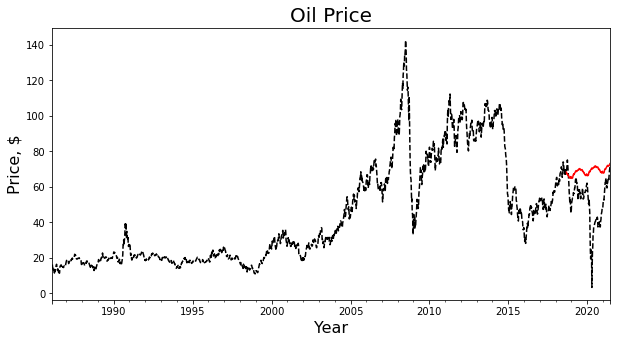

In [9]:

df['forecast'] = res.predict(start = 1700, end=1846, dynamic=False)  
t_ax1 = df['ts'].plot(figsize=(10, 5),linestyle='--', color='black') 
t_ax2 = df['forecast'].plot(linestyle='-',color='red')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price', fontsize=20)
plt.savefig('testing.png')
plt.show()

In [10]:
npredict =df.ts['2019'].shape[0]
nobs = df.ts.shape[0]

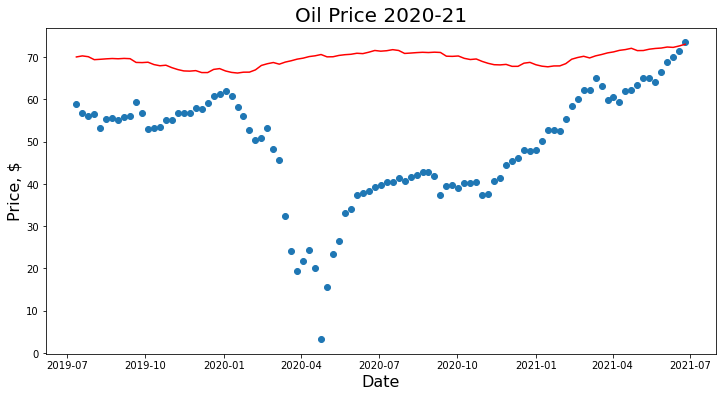

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
npre = 52

plt.xlabel('Date',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price 2020-21', fontsize=20)

ax.plot(df.index[-npredict-npre+1:], df.iloc[-npredict-npre+1:, df.columns.get_loc('ts')], 'o', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.iloc[-npredict-npre+1:, df.columns.get_loc('forecast')], 'red', label='Forecast')
plt.savefig('forecasted_vs_actual.png')
plt.show()

In [22]:
model = sm.tsa.statespace.SARIMAX(df['ts'],trend='n', order=(1,1,0), seasonal_order=(0,1,1,52))
res = model.fit()
print(res.summary())

/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                   ts   No. Observations:                 1846
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 52)   Log Likelihood               -3920.246
Date:                              Fri, 02 Jul 2021   AIC                           7846.493
Time:                                      15:23:58   BIC                           7862.968
Sample:                                  02-14-1986   HQIC                          7852.576
                                       - 06-25-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1930      0.010     19.525      0.000       0.174       0.212
ma.S.L52      -0.99

In [23]:
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2021-06-25", "%Y-%m-%d")
date_list = [start + relativedelta(weeks=x) for x in range(0,260)]
future = pd.DataFrame(index=date_list, columns= df.columns)
pred = pd.concat([df, future])

In [34]:
pred['forecast'] = res.predict(start = 1846, end=2214, dynamic=False)

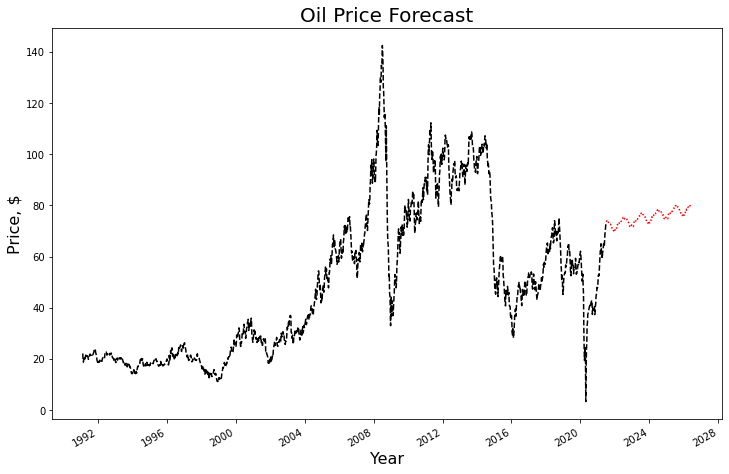

In [35]:
ax1 = pred['ts'].iloc[-1845:].plot(figsize=(12, 8), color='black',linestyle='--')
ax2 = pred['forecast'].iloc[-1845:].plot(linestyle=':',color='red')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price Forecast', fontsize=20)

plt.savefig('ts_predict_future.png')
plt.show()

In [36]:
pred['forecast_dynamic'] = res.predict(start = 1845, end=2214, dynamic=True)

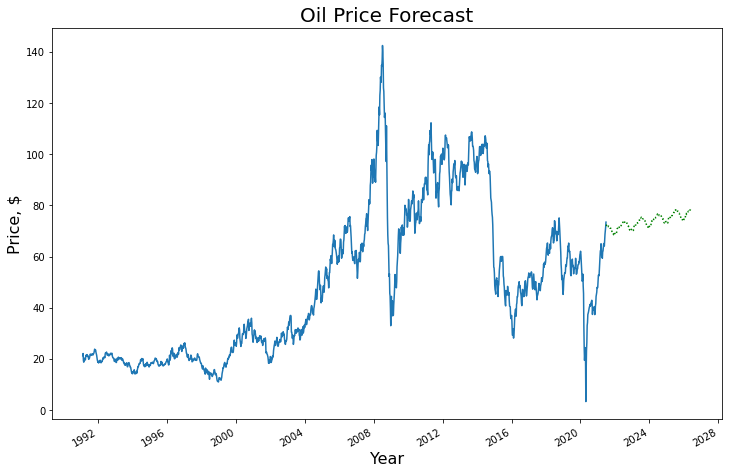

In [37]:
ax3 = pred['ts'].iloc[-1846:].plot(figsize=(12, 8))
ax4 = pred['forecast_dynamic'].iloc[-1846:].plot(linestyle=':',color='green')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price Forecast', fontsize=20)
plt.show()